In [1]:
%matplotlib inline
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pd.options.display.max_rows = 200

plt.rcParams['figure.figsize'] = [20, 10]
plt.rc('font', size=20)

# Loading Dataset

## IOT Devices

The dataset has been extracted at `ROOT_PATH`, containing the data for each IOT device. There are 9 devices in total. There are folders for each IOT device containing `benign_traffic.csv` and further two folders for `gafgyt_attacks` and `mirai_attacks`

In [3]:
ROOT_PATH = r'/mnt/data/khiz/dataset/00442'

IOT_DEVS = [ 'Danmini_Doorbell',
             'Ecobee_Thermostat',
             'Ennio_Doorbell',
             'B120N10_Baby_Mon',
             '737E_Security_Cam',
             '838_Security_Cam',
             'Samsung_Webcam',
             '1002_Security_Cam',
             '1003_Security_Cam'
           ]

## Paths to CSVs
We create a python dictionary that contains all the paths to the CSVs for the respective IOT devices

In [5]:
PATHS_DICT = {}

for i in IOT_DEVS:
    PATHS_DICT[i] = {}
    print('[' + i + ']')
    iot_dir = os.path.join(ROOT_PATH, i)
    PATHS_DICT[i]['benign'] = os.path.join(iot_dir, 'benign_traffic.csv')
    print('  ', 'benign_traffic.csv')
    attacks = [ d for d in os.listdir(iot_dir)
                   if os.path.isdir( os.path.join(iot_dir, d)) ]
    for attack in attacks:
        attack_name = attack.split('_')[0]
        
        PATHS_DICT[i][attack_name] = {}
        attack_dir = os.path.join(iot_dir, attack)
        types = [ f for f in os.listdir(attack_dir)
                   if os.path.isfile( os.path.join(attack_dir, f)) ]
        print('  ', attack_name, ': ', types)
        for t in types:
            type_name = t.split('.')[0]
            PATHS_DICT[i][attack_name][type_name] = os.path.join(attack_dir,t)

[Danmini_Doorbell]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[Ecobee_Thermostat]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[Ennio_Doorbell]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
[B120N10_Baby_Mon]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[737E_Security_Cam]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[838_Security_Cam]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.cs

## Loading CSVs into Pandas
Loading CSVs into pandas, adding four columns:
- `iot_dev`      : Name of IOT device
- `traffic_type` : benign or attack (0 or 1)
- `botnet`       : mirai or gafgyt
- `attack_type`  : type of attack e.g, ack, scan etc.

In [6]:
nbaiot = pd.DataFrame()
for iot_dev in PATHS_DICT:
    iot_dev_name = ' '. join(iot_dev.split('_'))
    df = pd.read_csv(PATHS_DICT[iot_dev]['benign'])
    df['traffic_type'] = 'benign'
    df['iot_dev'] = iot_dev_name
    df['botnet'] = 'benign'
    df['attack_type'] = 'benign'
    nbaiot = nbaiot.append(df)
    for botnet in [ b for b in PATHS_DICT[iot_dev] if b != 'benign']:
        for attack in PATHS_DICT[iot_dev][botnet]:
            df = pd.read_csv(PATHS_DICT[iot_dev][botnet][attack])
            df['traffic_type'] = 'attack'
            df['iot_dev'] = iot_dev_name
            df['botnet'] = botnet
            df['attack_type'] = attack
            nbaiot = nbaiot.append(df)

In [7]:
nbaiot.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000      354.000000            0.000000          1.000000   
2          1.857879      360.458980           35.789338          1.912127   
3          1.000000      337.000000            0.000000          1.000000   
4          1.680223      172.140917        18487.448750          1.793580   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1      354.000000            0.000000          1.000000      354.000000   
2      360.275733           35.923972          1.969807      360.091968   
3      337.000000            0.000000          1.000000      337.000000   
4      182.560279        18928.175300          1.925828      193.165753   

   MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.01_mean  \
0            0.000000            1.000000  ...        60.000000   
1            0.000000            1.000000  ...       344.262695   
2           35.991542            1.996939  ...       347.703087   
3            0.000000            1.000000  ...       337.000000   
4        19153.795810            1.992323  ...        60.000000   

   HpHp_L0.01_std  HpHp_L0.01_magnitude  HpHp_L0.01_radius  \
0        0.000000             60.000000           0.000000   
1        4.710446            344.262695          22.188299   
2        9.034660            347.703087          81.625077   
3        0.000000            337.000000           0.000000   
4        0.000000             60.000000           0.000000   

   HpHp_L0.01_covariance  HpHp_L0.01_pcc  traffic_type           iot_dev  \
0                    0.0             0.0        benign  Danmini Doorbell   
1                    0.0             0.0        benign  Danmini Doorbell   
2                    0.0             0.0        benign  Danmini Doorbell   
3                    0.0             0.0        benign  Danmini Doorbell   
4                    0.0             0.0        benign  Danmini Doorbell   

   botnet  attack_type  
0  benign       benign  
1  benign       benign  
2  benign       benign  
3  benign       benign  
4  benign       benign  

[5 rows x 119 columns]

In [43]:
nbaiot.info(max_cols=120)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7062606 entries, 0 to 84435
Data columns (total 116 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MI_dir_L5_weight       float64
 1   MI_dir_L5_mean         float64
 2   MI_dir_L5_variance     float64
 3   MI_dir_L3_weight       float64
 4   MI_dir_L3_mean         float64
 5   MI_dir_L3_variance     float64
 6   MI_dir_L1_weight       float64
 7   MI_dir_L1_mean         float64
 8   MI_dir_L1_variance     float64
 9   MI_dir_L0.1_weight     float64
 10  MI_dir_L0.1_mean       float64
 11  MI_dir_L0.1_variance   float64
 12  MI_dir_L0.01_weight    float64
 13  MI_dir_L0.01_mean      float64
 14  MI_dir_L0.01_variance  float64
 15  H_L5_weight            float64
 16  H_L5_mean              float64
 17  H_L5_variance          float64
 18  H_L3_weight            float64
 19  H_L3_mean              float64
 20  H_L3_variance          float64
 21  H_L1_weight            float64
 22  H_L1_mean          

In [9]:
nbaiot['traffic_type']\
.value_counts()

attack    6506674
benign     555932
Name: traffic_type, dtype: int64

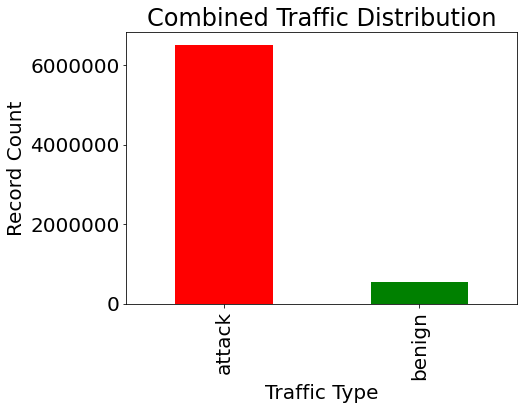

In [23]:
cmap = plt.cm.get_cmap('Spectral')
nbaiot['traffic_type']\
.value_counts()\
.plot(kind='bar',
      xlabel = "Traffic Type",
      ylabel = "Record Count",
      title = "Combined Traffic Distribution",
      figsize=(7,5),
      color=['red','green','#d9534f']
)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [34]:
pd.DataFrame(nbaiot[['iot_dev','botnet']].groupby(['iot_dev','botnet']).size())

0
iot_dev           botnet        
1002 Security Cam benign   46585
                  gafgyt  303223
                  mirai   513248
1003 Security Cam benign   19528
                  gafgyt  316438
                  mirai   514860
737E Security Cam benign   62154
                  gafgyt  330096
                  mirai   436010
838 Security Cam  benign   98514
                  gafgyt  309040
                  mirai   429337
B120N10 Baby Mon  benign  175240
                  gafgyt  312723
                  mirai   610714
Danmini Doorbell  benign   49548
                  gafgyt  316650
                  mirai   652100
Ecobee Thermostat benign   13113
                  gafgyt  310630
                  mirai   512133
Ennio Doorbell    benign   39100
                  gafgyt  316400
Samsung Webcam    benign   52150
                  gafgyt  323072

<AxesSubplot:title={'center':'Trrafic Break Down Per Device'}, xlabel='IoT Device', ylabel='Record Count'>

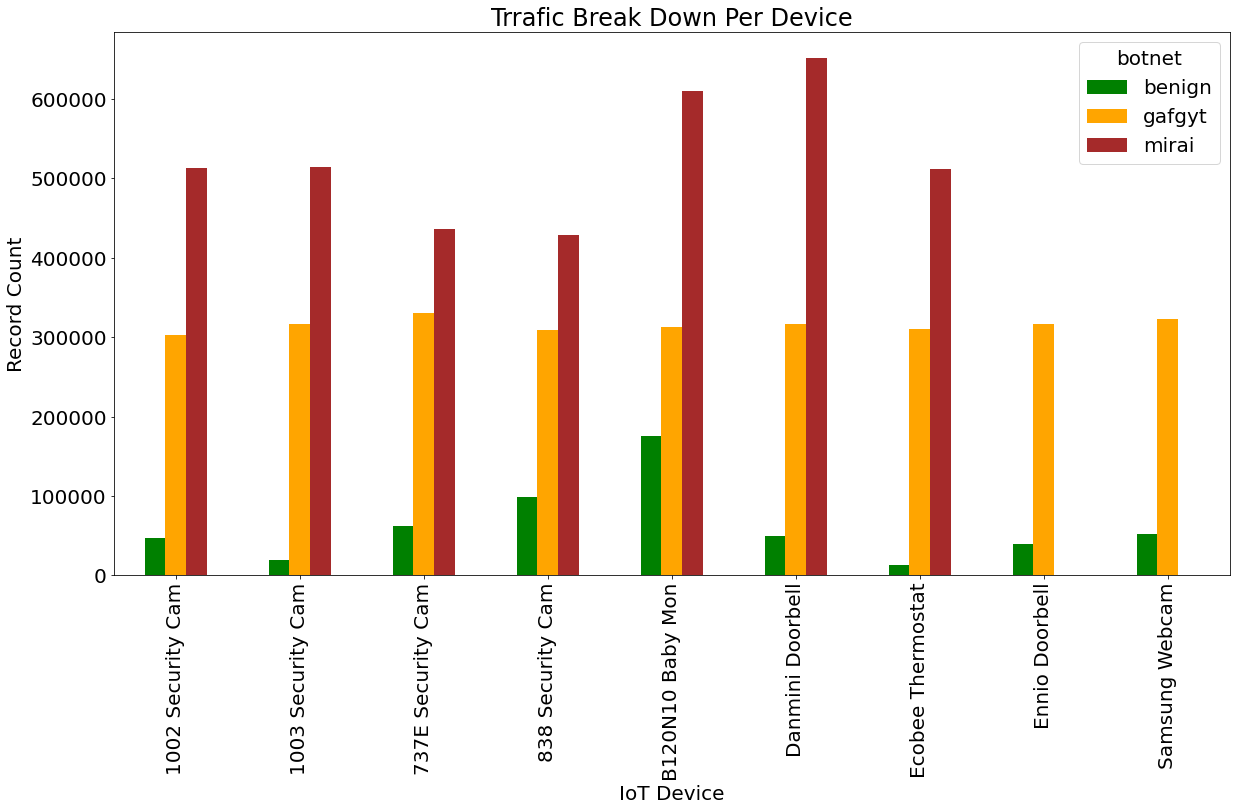

In [33]:
nbaiot[['iot_dev','botnet']]\
.groupby(['iot_dev','botnet'])\
.size()\
.unstack(level=1)\
.plot(kind='bar',
      xlabel = 'IoT Device',
      ylabel = 'Record Count',
      title = 'Trrafic Break Down Per Device',
      color = ['green', 'orange', 'brown']
     )

In [38]:

nbaiot.loc[ nbaiot['traffic_type']=='attack','traffic_type' ]=1
nbaiot.loc[ nbaiot['traffic_type']=='benign','traffic_type' ]=0
nbaiot['traffic_type'] = nbaiot['traffic_type'].astype(int)

nbaiot.drop( ["attack_type", "iot_dev", "botnet" ], axis=1, inplace=True )
        


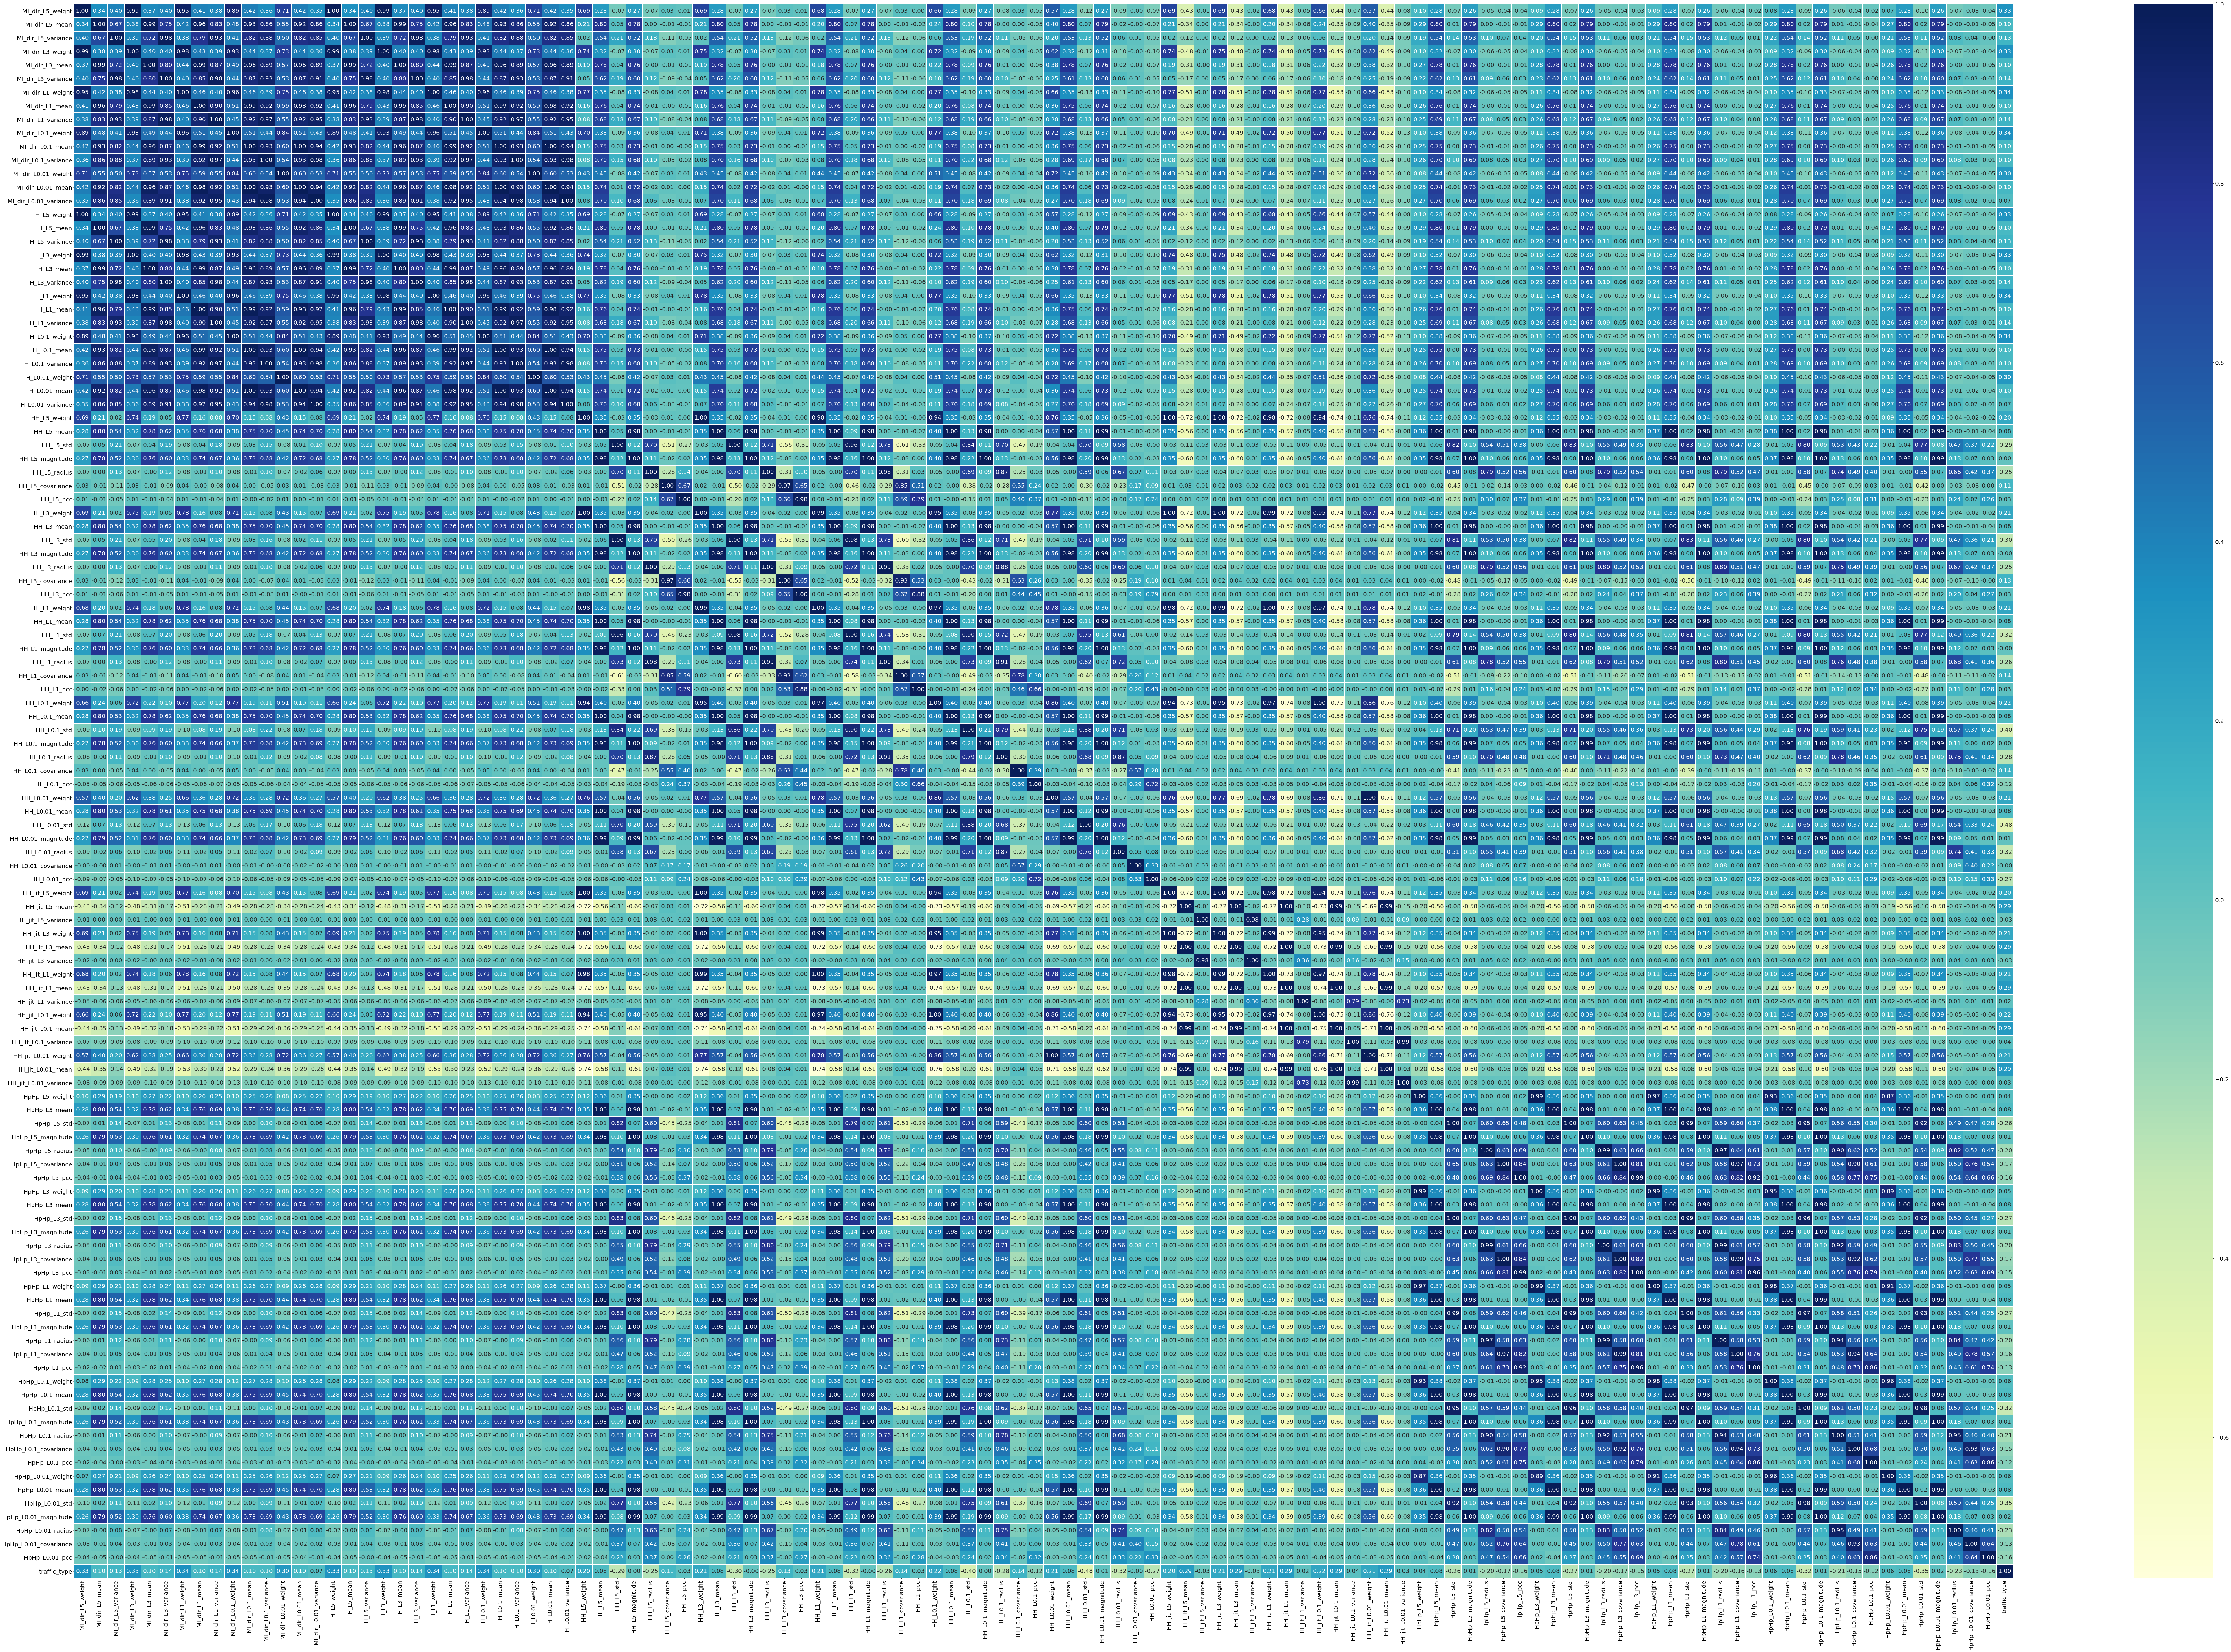

In [39]:
import seaborn as sb
corr_matrix = nbaiot.corr()
plt.figure(figsize=(150, 100))
sb.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");